In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error,confusion_matrix,r2_score
from sklearn.model_selection import train_test_split

C:\Users\spard\DEMO\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
t=pd.read_csv('C:\\Users\\spard\\OneDrive\\Documents\\soham\\Titanic-Dataset.csv', encoding = 'ISO-8859-1')

In [3]:
t

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
t.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
t.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
t.fillna(method='ffill',inplace=True)

In [7]:
t.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,578,1,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.0,1,0,13507,55.9000,E44,S
174,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C
64,65,0,1,"Stewart, Mr. Albert A",male,4.0,0,0,PC 17605,27.7208,C83,C
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,C2,S
765,766,1,1,"Hogeboom, Mrs. John C (Anna Andrews)",female,51.0,1,0,13502,77.9583,D11,S
467,468,0,1,"Smart, Mr. John Montgomery",male,56.0,0,0,113792,26.5500,E63,S
674,675,0,2,"Watson, Mr. Ennis Hastings",male,31.0,0,0,239856,0.0000,B71,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,C2,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
344,345,0,2,"Fox, Mr. Stanley Hubert",male,36.0,0,0,229236,13.0000,C23 C25 C27,S


In [8]:
t.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       0
dtype: int64

In [9]:
x = t.drop(["PassengerId",'Survived','Name','Sex','Ticket','Cabin','Embarked'], axis=1)
y = t["Survived"]


In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=123)

In [11]:
corrmatrix=x_train.corr()

In [12]:
corrmatrix

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.297965,0.069397,-0.004489,-0.548232
Age,-0.297965,1.000000,-0.163500,-0.167753,0.094824
SibSp,0.069397,-0.163500,1.000000,0.426074,0.164995
Parch,-0.004489,-0.167753,0.426074,1.000000,0.226198
Fare,-0.548232,0.094824,0.164995,0.226198,1.000000


<AxesSubplot:>

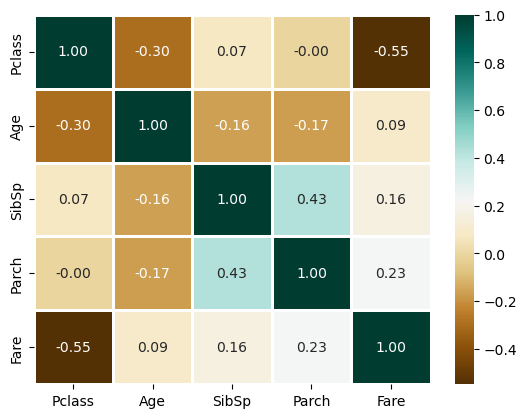

In [13]:
sns.heatmap(corrmatrix,cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [14]:
def correlation(h,threshold):
    cor_col=set()
    cor_mat=h.corr()
    for i in range(len(cor_mat.columns)):
        for j in range(i):
            if abs(cor_mat.iloc[i,j])>threshold:
                cname=cor_mat.columns[i]
                cor_col.add(cname)
    return cor_col
    

In [15]:
correlation(x_train,.3)

{'Fare', 'Parch'}

In [16]:
model=RandomForestClassifier(n_estimators=50)

In [17]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [18]:
model.score(x_test,y_test)

0.664804469273743

In [19]:
y_pred=model.predict(x_test)

In [20]:
new_data=model.predict(np.array([[1,27,1,1,8.1234]]))
new_data

C:\Users\spard\DEMO\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [21]:
confusion_matrix(y_test,y_pred)

array([[81, 33],
       [27, 38]], dtype=int64)

In [22]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [23]:
mse,rmse

(0.33519553072625696, 0.5789607333198487)

In [24]:
mean_absolute_error(y_test,y_pred)

0.33519553072625696

In [25]:
ap=pd.DataFrame(data={'actual':y_test,'predicted':y_pred})
ap

,actual,predicted
172,1,1
524,0,0
452,0,1
170,0,0
620,0,0
...,...,...
388,0,1
338,1,0
827,1,1
773,0,0


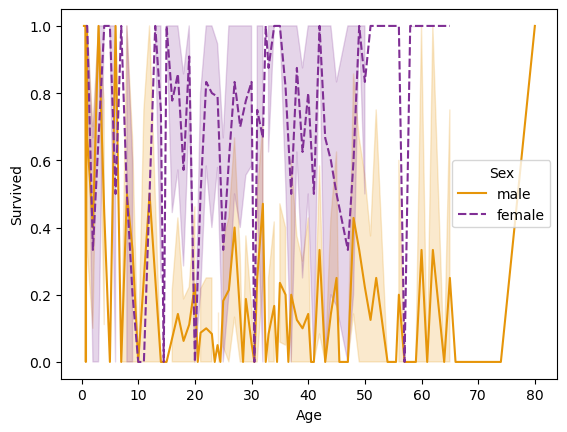

In [26]:
sns.lineplot(y='Survived',x='Age',data=t,hue='Sex',palette='CMRmap_r',style='Sex')
plt.show()

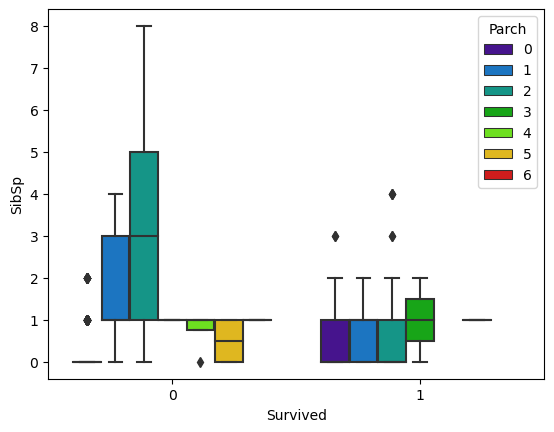

In [27]:
sns.boxplot(x='Survived',y='SibSp',data=t,palette='nipy_spectral',hue='Parch')
plt.show()

<AxesSubplot:xlabel='SibSp', ylabel='count'>

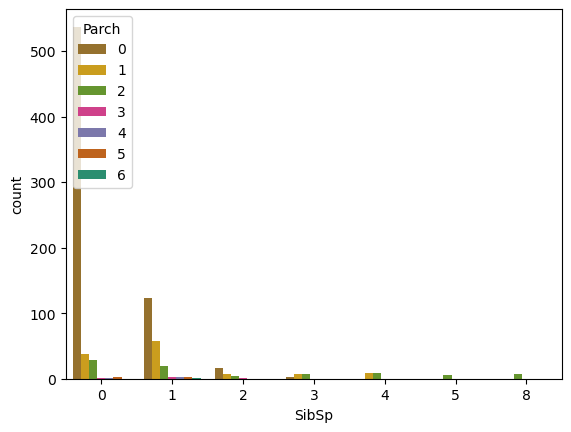

In [28]:
sns.countplot(x="SibSp",data=t,palette='Dark2_r',hue='Parch')

C:\Users\spard\DEMO\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


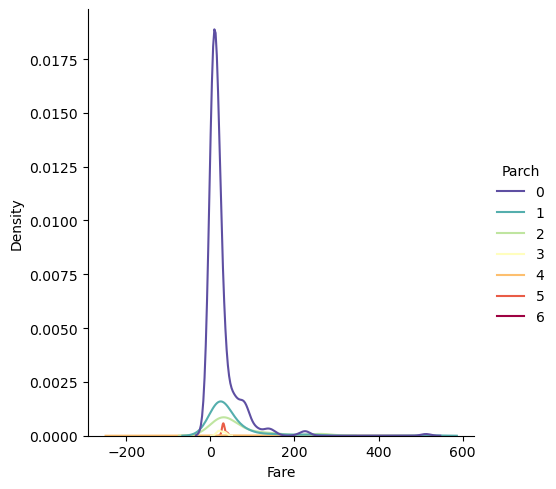

In [29]:
sns.displot(x='Fare',data=t,palette='Spectral_r',hue='Parch',kind='kde')

<AxesSubplot:xlabel='Pclass', ylabel='Proportion'>

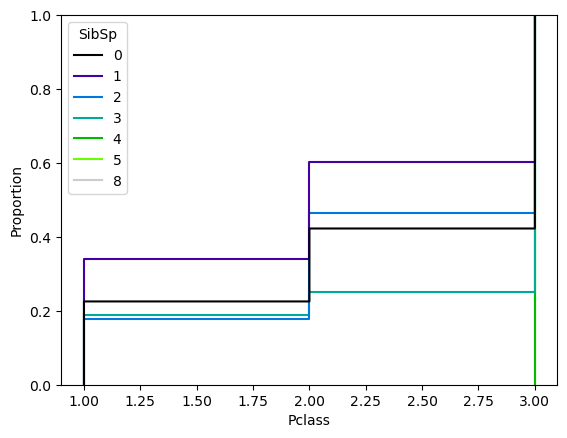

In [30]:
sns.ecdfplot(x='Pclass',data=t,palette='nipy_spectral',hue='SibSp')

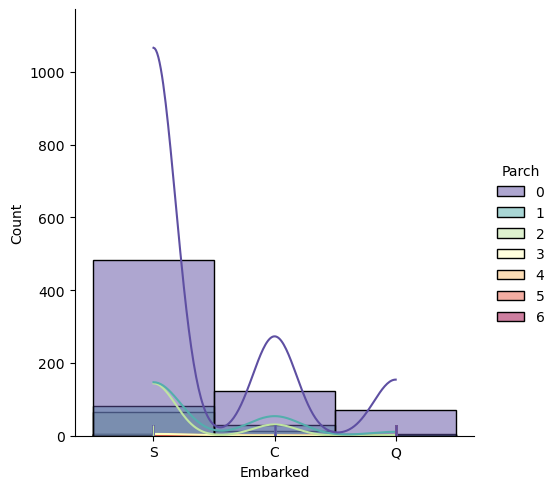

In [31]:
sns.displot(x='Embarked',data=t,color='g',kde=True,rug=True,hue='Parch',palette='Spectral_r')

<AxesSubplot:xlabel='SibSp', ylabel='Parch'>

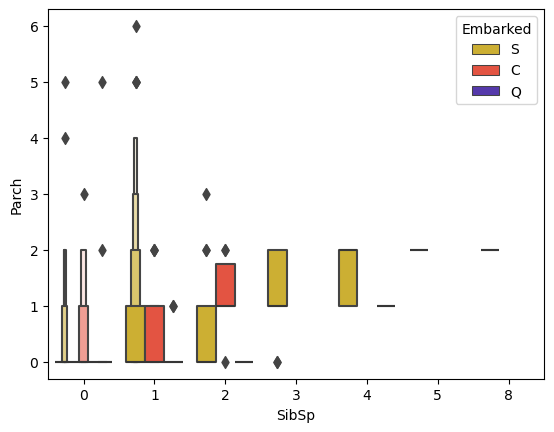

In [32]:
sns.boxenplot(x='SibSp',y='Parch',data=t,palette='CMRmap_r',hue='Embarked')

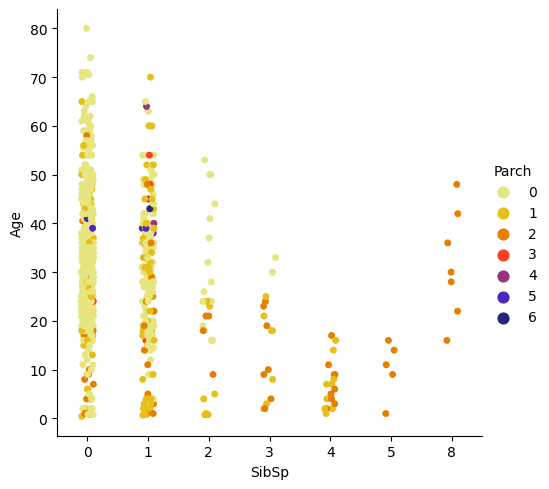

In [33]:
sns.catplot(x='SibSp',y='Age',data=t,palette='CMRmap_r',hue='Parch')

C:\Users\spard\DEMO\lib\site-packages\seaborn\distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\spard\DEMO\lib\site-packages\seaborn\distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Fare', ylabel='Age'>

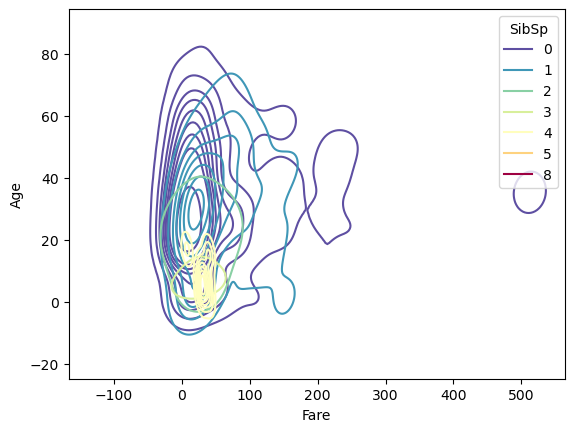

In [34]:
sns.kdeplot(x='Fare',y='Age',data=t,palette='Spectral_r',hue='SibSp')

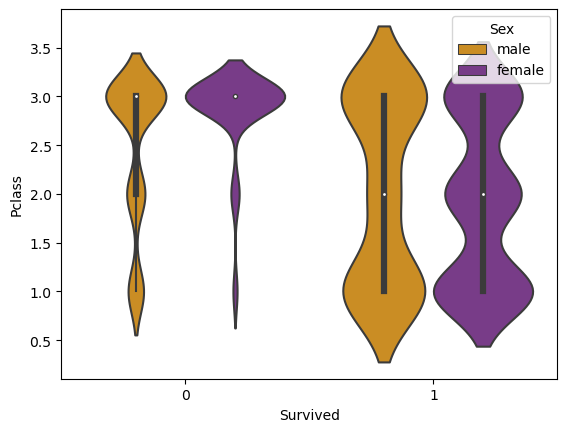

In [35]:
sns.violinplot(x='Survived',y='Pclass',data=t,palette='CMRmap_r',hue='Sex')
plt.show()

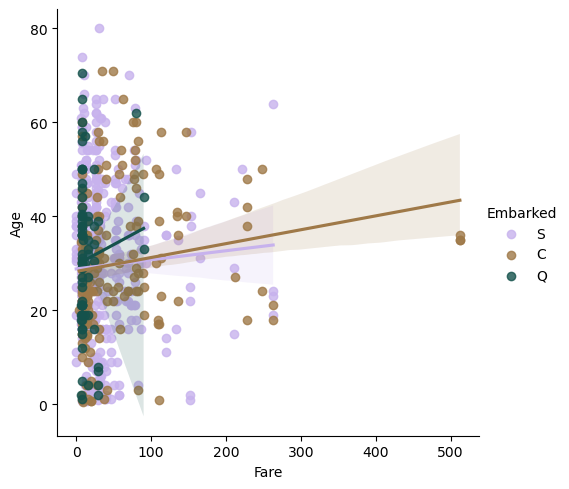

In [36]:
sns.lmplot(x='Fare',y='Age',hue='Embarked',data=t,palette='cubehelix_r')

C:\Users\spard\DEMO\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 84.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\spard\DEMO\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 61.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\spard\DEMO\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\spard\DEMO\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\spard\DEMO\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you ma

<AxesSubplot:xlabel='SibSp', ylabel='Fare'>

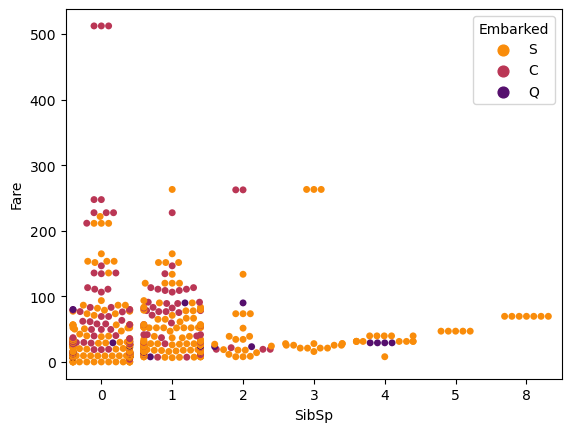

In [37]:
sns.swarmplot(x='SibSp',y='Fare',data=t,palette='inferno_r',hue='Embarked')

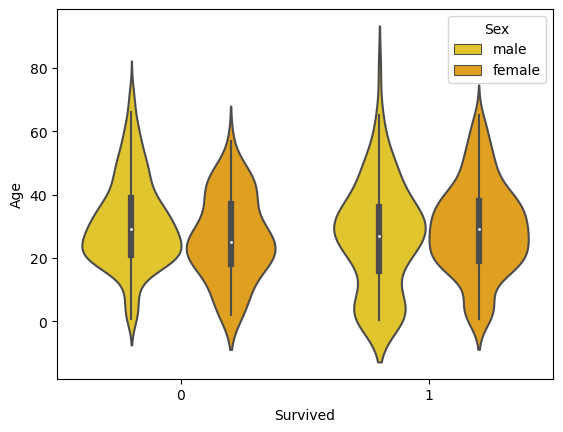

In [38]:
sns.violinplot(x='Survived',y='Age',data=t,palette='Wistia',hue='Sex')
plt.show()

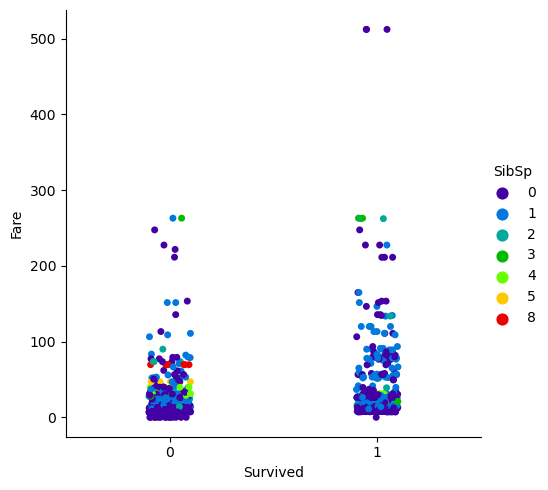

In [39]:
sns.catplot(x='Survived',y='Fare',data=t,palette='nipy_spectral',hue='SibSp')

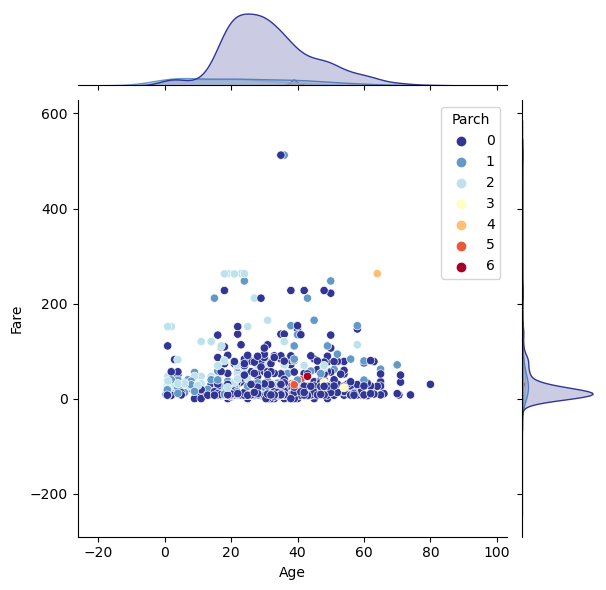

In [42]:
sns.jointplot(x='Age',y='Fare',data=t,palette='RdYlBu_r',hue='Parch',kind='scatter')

C:\Users\spard\DEMO\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


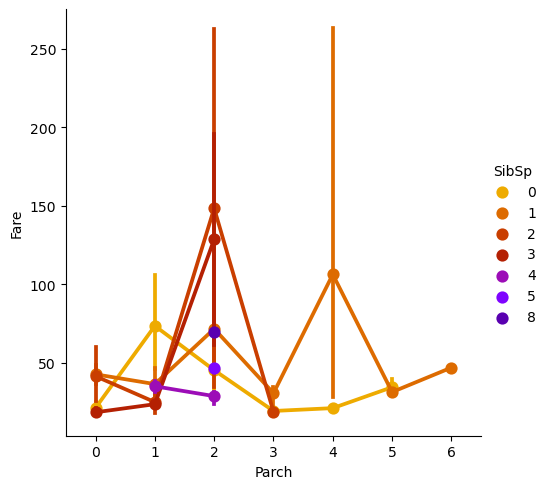

In [44]:
sns.factorplot(x='Parch',y='Fare',data=t,palette='gnuplot_r',hue='SibSp')

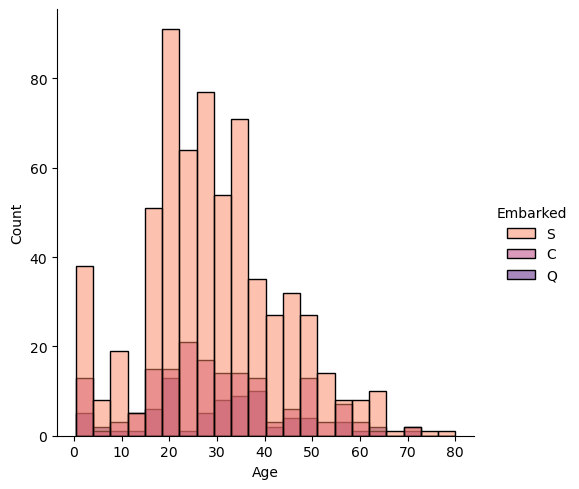

In [46]:
sns.displot(x='Age',data=t,palette='magma_r',hue='Embarked')

<AxesSubplot:xlabel='Age', ylabel='Proportion'>

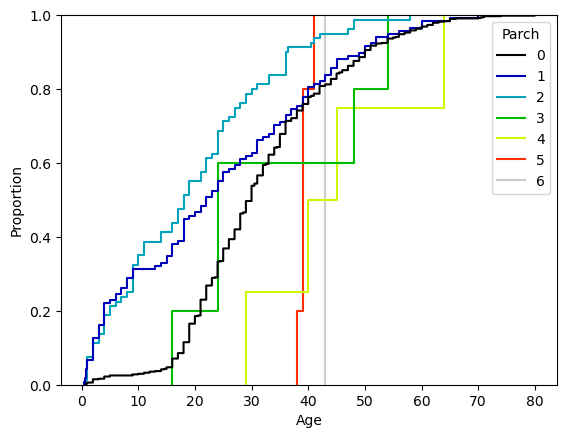

In [47]:
sns.ecdfplot(x='Age',data=t,palette='nipy_spectral',hue='Parch')

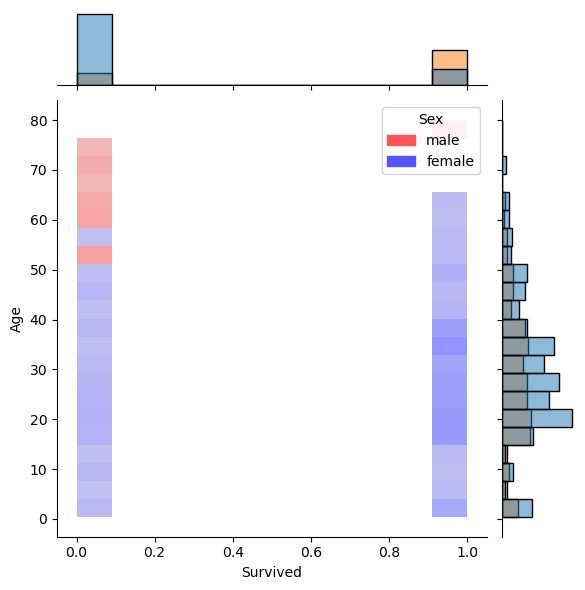

In [48]:
sns.jointplot(x="Survived",y='Age',data=t,hue='Sex',palette='seismic_r',kind='hist')

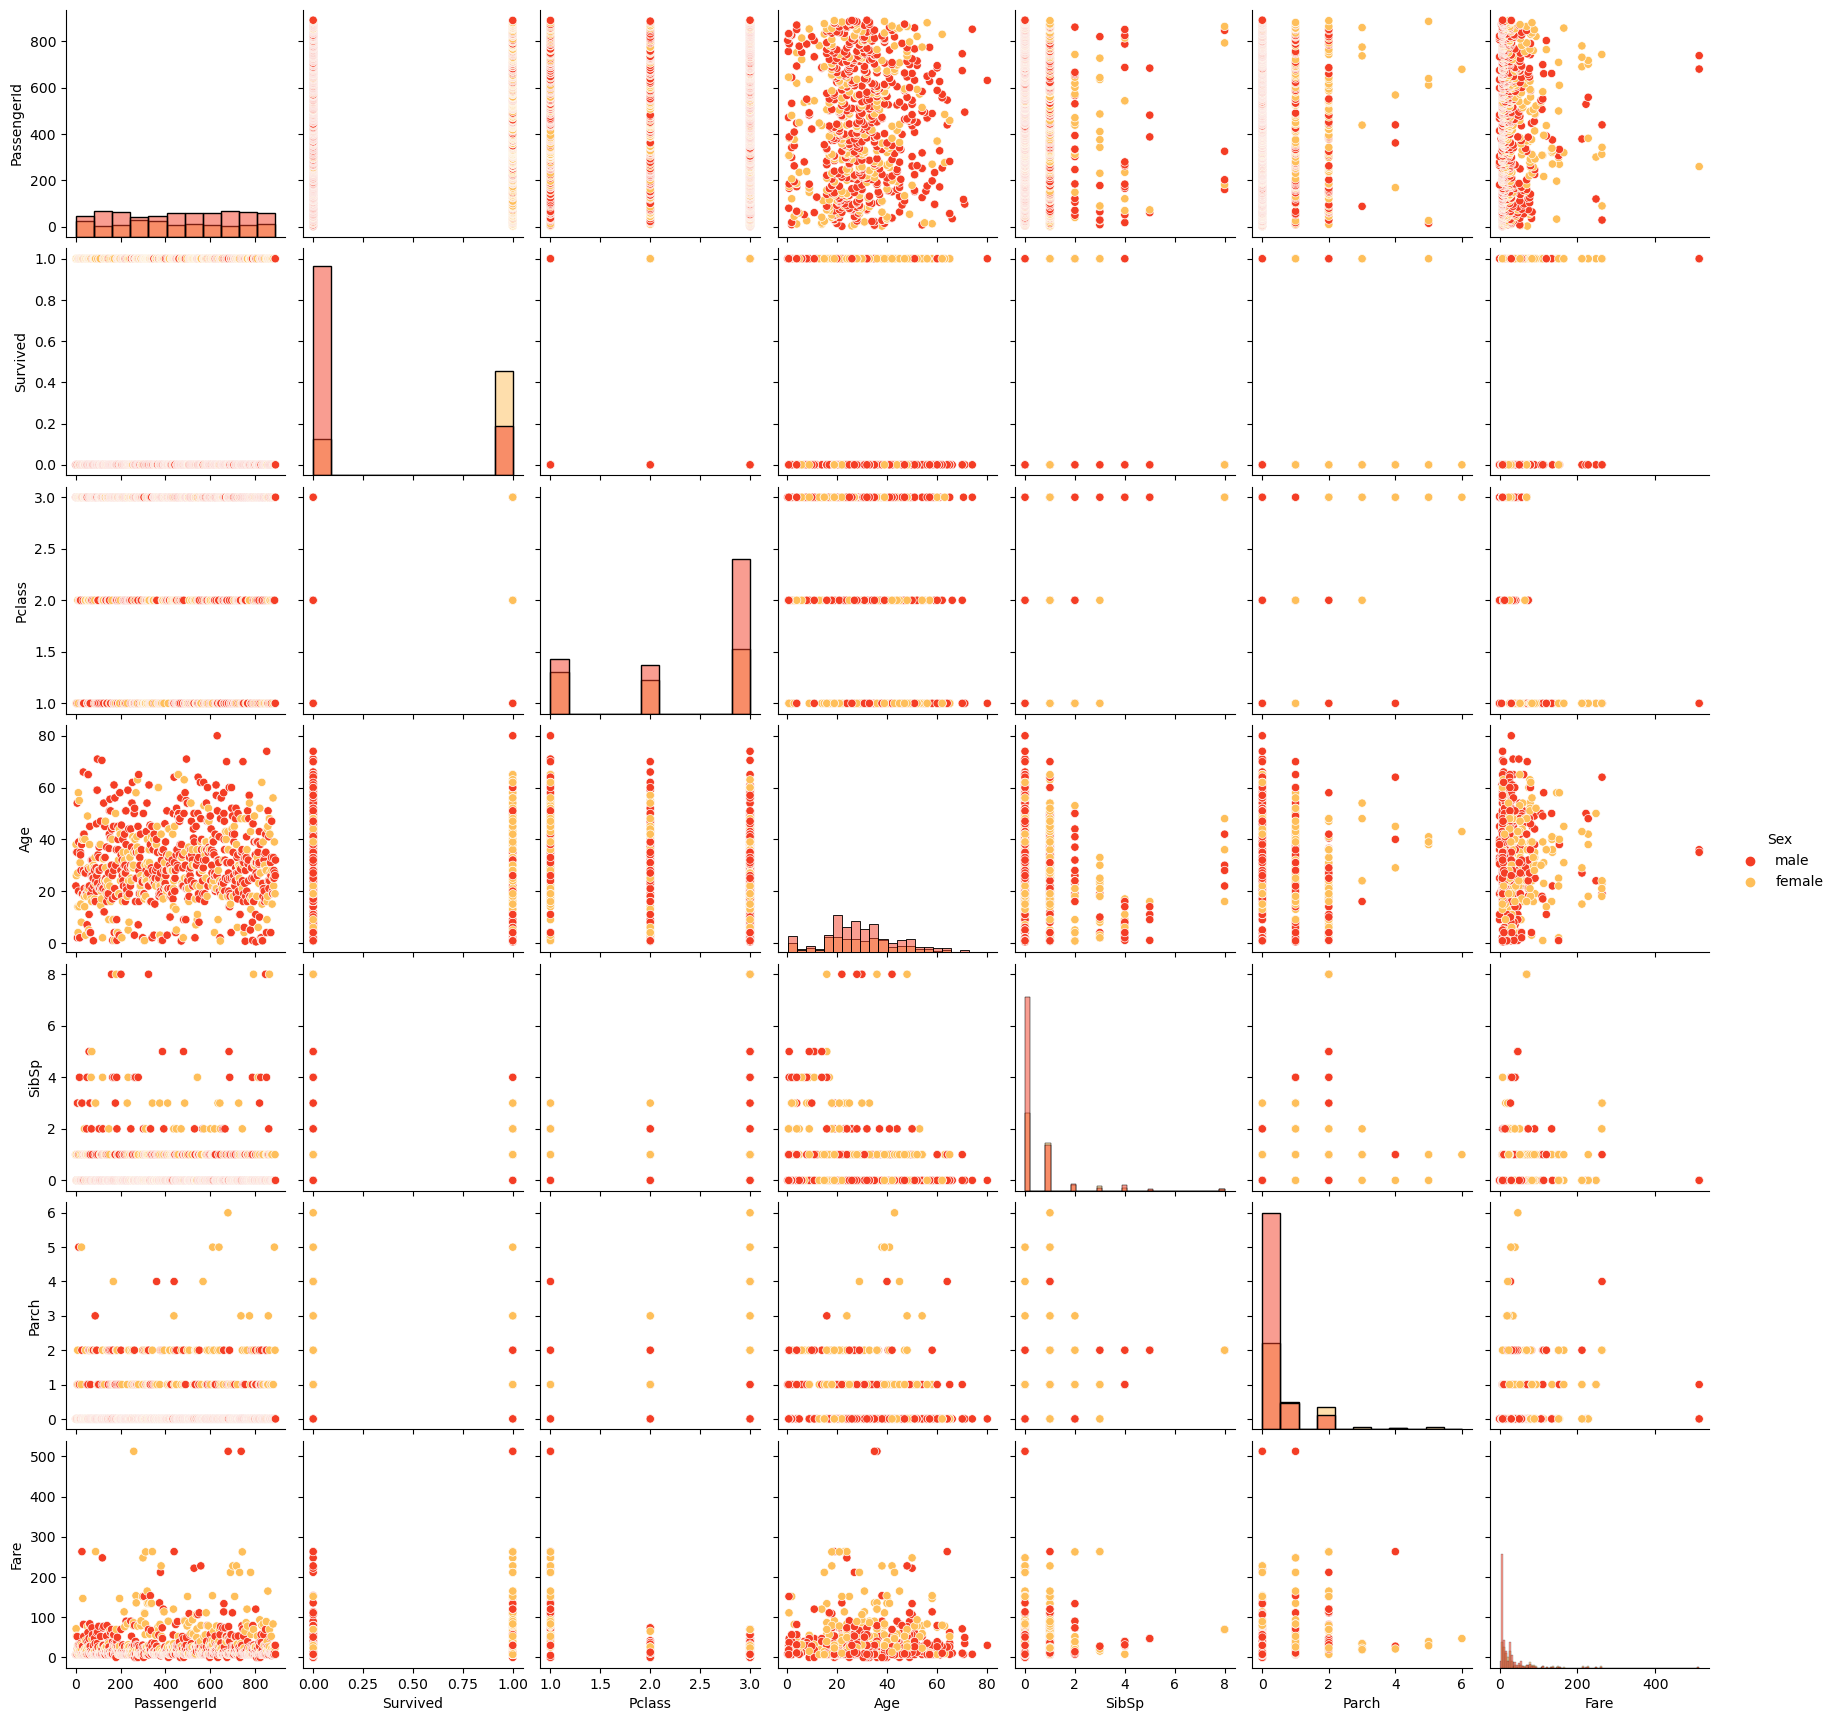

In [57]:
sns.pairplot(data=t,hue='Sex',diag_kind='hist',palette='YlOrRd_r')